In [1]:
import sys, os
from icecube import icetray, dataclasses, dataio
from I3Tray import I3Tray
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random 

gcdFile = dataio.I3File('/cvmfs/icecube.opensciencegrid.org/data/GCD/GeoCalibDetectorStatus_2020.Run134142.Pass2_V0.i3.gz')
frame = gcdFile.pop_frame()

while not frame.Has('I3Geometry'):
    frame = gcdFile.pop_frame()
geometry = frame.Get('I3Geometry')
om_geometry = geometry.omgeo

dom_x_positions=np.zeros((87,67))
dom_y_positions=np.zeros((87,67))
dom_z_positions=np.zeros((87,67))

for om, geo_info in om_geometry:
    dom_x_positions[om[0],om[1]]=geo_info.position.x
    dom_y_positions[om[0],om[1]]=geo_info.position.y
    dom_z_positions[om[0],om[1]]=geo_info.position.z
    
#places the selected string numbers of x, y, z positions into a new array
gen2_dom_x_positions = np.concatenate((dom_x_positions[1:6:2], dom_x_positions[14:21:2], dom_x_positions[31:40:2], dom_x_positions[51:60:2], dom_x_positions[68:75:2]))
gen2_dom_y_positions = np.concatenate((dom_y_positions[1:6:2], dom_y_positions[14:21:2], dom_y_positions[31:40:2], dom_y_positions[51:60:2], dom_y_positions[68:75:2]))
gen2_dom_z_positions = np.concatenate((dom_z_positions[1:6:2], dom_z_positions[14:21:2], dom_z_positions[31:40:2], dom_z_positions[51:60:2], dom_z_positions[68:75:2]))


In [2]:
def fibonacci_of(n):
    if n in {0, 1}:  # Base case
        return n
    return fibonacci_of(n - 1) + fibonacci_of(n - 2)  # Recursive case


In [3]:
[fibonacci_of(n) for n in range(21)]

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765]

In [5]:
#glden ratio
g = (1 + math.sqrt(5))/2
print(g)

1.618033988749895


In [8]:
def fibBinet(n):
    phi = (1 + 5**0.5)/2.0
    return int(round((phi**n - (1-phi)**n) / 5**0.5))

In [9]:
[fibBinet(n) for n in range(21)]

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765]

took 𝑟 = 𝑠√𝑛, 𝜙 = (2𝜋/𝑔^2)*𝑛 from arXiv:2107.08527v2 using n as the fibonacci numbers and s = 240 m for string spacing

In [10]:
theta = ((2*math.pi)/(g**2))*fibBinet(10)

In [11]:
print(theta)

131.99797763507593


In [14]:
r = 240.0*(fibBinet(10))**(1/2)
print(r)

1779.887636902959


In [15]:
index = 0
r_positions = []
for n in range(1,22):
    r = 240*(math.sqrt(fibBinet(n)))
    print(r)
    r_positions.insert(index, r)
    index = index + 1
print(r_positions)   

240.0
240.0
339.4112549695428
415.6921938165305
536.6563145999496
678.8225099390856
865.3323061113574
1099.8181667894016
1399.4284547628722
1779.887636902959
2264.155471693585
2880.0
3663.4410053936995
4659.957081347424
5927.562736909665
7539.973474754404
9590.995777290282
12199.934426053282
15518.556633914122
19739.908814379058
25109.551967329087
[240.0, 240.0, 339.4112549695428, 415.6921938165305, 536.6563145999496, 678.8225099390856, 865.3323061113574, 1099.8181667894016, 1399.4284547628722, 1779.887636902959, 2264.155471693585, 2880.0, 3663.4410053936995, 4659.957081347424, 5927.562736909665, 7539.973474754404, 9590.995777290282, 12199.934426053282, 15518.556633914122, 19739.908814379058, 25109.551967329087]


In [6]:
phi = (2*math.pi)/g**2
print(phi)

2.399963229728653


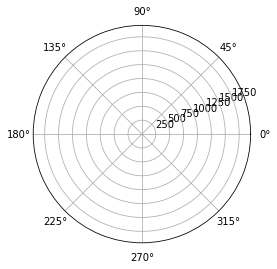

In [16]:
plt.polar(131.99797763507593,1854.0496217739158)
plt.show()

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
plt.show()

<Figure size 432x288 with 0 Axes>

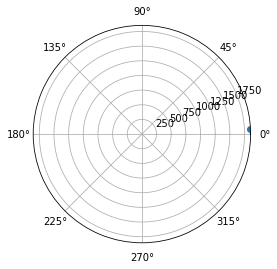

In [18]:
plt.axes(projection='polar')
plt.scatter(131.99797763507593,1854.0496217739158)
#ax.set_rticks([10, 20])
#ax.set_rmax(2000)
plt.show()

[-0.07373689  0.01236386  0.1053847  -0.1969427   0.18866942 -0.06358981
 -0.12194454  0.26568018 -0.27730367  0.13403187  0.09926123 -0.29971795
  0.35214546 -0.21519373 -0.04977198  0.3058596  -0.41195847  0.30073085
 -0.02013438 -0.28653384  0.45416506]
[ 0.06754903 -0.14087986  0.13745568 -0.03483639 -0.12001604  0.23655092
 -0.23479678  0.09702598  0.11446692 -0.28641833  0.31646044 -0.17369268
 -0.07741819  0.30609093 -0.3840869   0.25777879  0.01703578 -0.29926736
  0.43542463 -0.3433633   0.06110727]


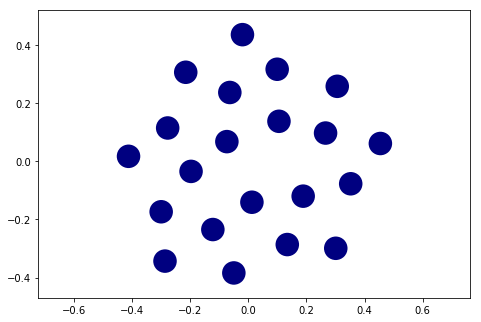

Circle(xy=(-0.0737369, 0.067549), radius=0.0404508)
Circle(xy=(0.0123639, -0.14088), radius=0.0404508)
Circle(xy=(0.105385, 0.137456), radius=0.0404508)


In [66]:
# chromoSpirals.py
# ----------------
# Code written by Peter Derlien, University of Sheffield, March 2013
# Draws spiralling patterns of circles using the Golden Angle.
# ----------------

# Import from the numpy and matplotlib packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches

ox=0.0; oy=0.0 # centre of plot

ndiscs=21
ncols = 1
offset=0.0
tau=(1+5**0.5)/2.0 # golden ratio approx = 1.618033989
#(2-tau)*2*np.pi is golden angle = c. 2.39996323 radians, or c. 137.5 degrees
inc = (2-tau)*2*np.pi + offset
theta=0
k=0.1 # scale factor
drad=k*(1+5**0.5)/8.0 # radius of each disc
minv=maxv=0 # minv and maxv will be used later to display inputs chosen

# now collect in list 'patches' the locations of all the discs
patches = []
x_pos = []
y_pos =[]
for j in range(1,ndiscs+1):
    r = k*j**0.5
    theta += inc
    x = ox + r*np.cos(theta)
    y = oy + r*np.sin(theta)
    x_pos = np.insert(x_pos, j-1, x)
    y_pos = np.insert(y_pos, j-1, y)
    if y > maxv:
        maxv=y
    elif y < minv:
        minv=y
    
    disc = mpatches.Circle((x,y),drad) 
    patches.append(disc)

print(x_pos)
print(y_pos)
# start building the plot 
fig = plt.figure()
ax = plt.axes([0,0,1,1])
        
# bring together the information for locations and colours of discs
collection = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=1.0)
collection.set_array(np.array(colcycle))
ax.add_collection(collection)
   
#ax.set_xticks([]); ax.set_yticks([]) # suppress display of axes
plt.axis('equal')
plt.show() # display the plot we have built
print(patches[0])
print(patches[1])
print(patches[2])

In [93]:
def IC_bounds():
    x31_x75 = np.array([dom_x_positions[31][1],dom_x_positions[75][1]])
    y31_y75 = np.array([dom_y_positions[31][1],dom_y_positions[75][1]])
    
    x75_x78 = np.array([dom_x_positions[75][1],dom_x_positions[78][1]])
    y75_y78 = np.array([dom_y_positions[75][1],dom_y_positions[78][1]])
    
    x78_x72 = np.array([dom_x_positions[78][1],dom_x_positions[72][1]])
    y78_y72 = np.array([dom_y_positions[78][1],dom_y_positions[72][1]])
    
    x72_x74 = np.array([dom_x_positions[72][1],dom_x_positions[74][1]])
    y72_y74 = np.array([dom_y_positions[72][1],dom_y_positions[74][1]])
    
    x74_x50 = np.array([dom_x_positions[74][1],dom_x_positions[50][1]])
    y74_y50 = np.array([dom_y_positions[74][1],dom_y_positions[50][1]])
    
    x50_x6 = np.array([dom_x_positions[50][1],dom_x_positions[6][1]])
    y50_y6 = np.array([dom_y_positions[50][1],dom_y_positions[6][1]])
    
    x6_x1 = np.array([dom_x_positions[6][1],dom_x_positions[1][1]])
    y6_y1 = np.array([dom_y_positions[6][1],dom_y_positions[1][1]])
    
    x1_x31 = np.array([dom_x_positions[1][1],dom_x_positions[31][1]])
    y1_y31 = np.array([dom_y_positions[1][1],dom_y_positions[31][1]])
    
    plt.plot(x31_x75, y31_y75, color='red')
    plt.plot(x75_x78, y75_y78, color='red')
    plt.plot(x78_x72, y78_y72, color='red')
    plt.plot(x72_x74, y72_y74, color='red')
    plt.plot(x74_x50, y74_y50, color='red')
    plt.plot(x50_x6, y50_y6, color='red')
    plt.plot(x6_x1, y6_y1, color='red')
    plt.plot(x1_x31, y1_y31, color='red')
    

In [112]:
"""  x: choosen x cooordinates
     y: choosen y coordinates
     random_gen: random number generator used to create x,y coordinates
"""
def plot_2d_icetop(x, y, random_gen):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('X-axis (m)')
    ax.set_ylabel('Y-axis (m)')
    ax.set_title("2D Gen2 Randomized Geometry with IceTop \n" + random_gen)
    IC_bounds()
    ax.scatter(x, y, s=30, c='blue')
    annotations=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21"]
    for i, label in enumerate(annotations):
        plt.annotate(label, (x[i], y[i]))
    return fig
    

[ -81.11057659   13.60025102  115.92317226 -216.63696677  207.53636151
  -69.94878902 -134.13899014  292.24820167 -305.03403353  147.43505936
  109.18735126 -329.68975041  387.36000395 -236.71310046  -54.74917375
  336.445558   -453.15431877  330.80393647  -22.14782294 -315.18722443
  499.58156631]


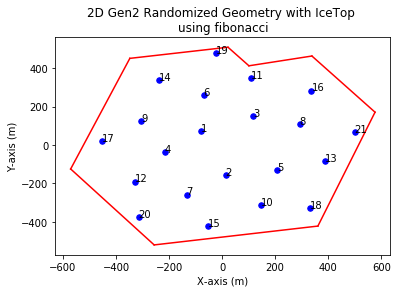

In [124]:
x_pos_gen2 = 1100*x_pos
y_pos_gen2 = 1100*y_pos
plot_2d_icetop(x_pos_gen2, y_pos_gen2, "using fibonacci")
print(x_pos_gen2)

In [120]:
x1= x_pos_gen2[1]
y1= y_pos_gen2[1]
x2= x_pos_gen2[6]
y2= y_pos_gen2[6]

In [121]:
distance = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
print(distance)

180.2763262288222
